# 2. Análisis de pulsos de radar
1. Genere un pulso rectangular de 20 muestras. Tip: Utilice la función de numpy np.ones(20).


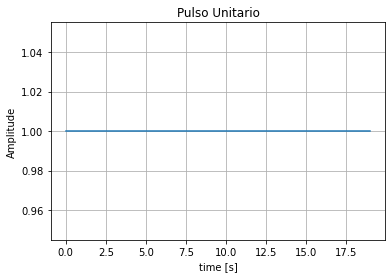

In [27]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

rect_pulse = np.ones(20)

plt.title("Pulso Unitario")
plt.plot(rect_pulse)
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.grid()

2. Calcule y grafique la función de autocorrelación del pulso generado. ¿Qué puede concluir de la gráfica obtenida?

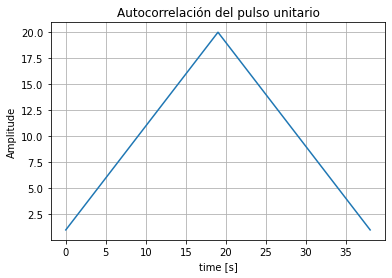

In [39]:
Rxx = np.correlate(rect_pulse, rect_pulse, mode='full')
tau = np.arange(-len(rect_pulse)+1,len(rect_pulse),1) # vector de retraso

plt.title("Autocorrelación del pulso unitario")
plt.plot(Rxx)
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.grid()
plt.show()


Se puede concluir que justo en el centro de toda la longitud del vector rect_pulse, el pulso unitario, se encuentra el valor máximo de energía de la señal, es decir en la muestra 19 porque el vector se extiende de [0, 19].

3. Utilice la función delay_noise incluida en la librería adjunta ’utils.py’ para simular el ruido introducido por el
canal, y el desfase de la señal recibida respecto a la original. Grafique el resultado, ¿Es capaz de distinguir el
pulso y decir cuanto es su retraso?


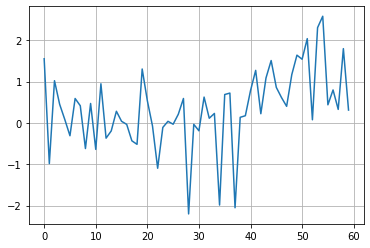

In [45]:
import utils as utils

delayed_pulse = utils.delay_noise(rect_pulse)

plt.plot(delayed_pulse)
plt.grid()
plt.show()

A simple vista resulta muy dificil lograr distinguir el pulso y medir su retraso, esta señal resultante se podría interpretar como puro ruido por tener caracteristicas aleatorias en toda su extensión. Para la práctica en realización cumple con el propósito de simular el ruido introducido por un canal en un sistema de comunicaciones.

4. Utilice la función de numpy np.correlate para hallar la correlación entre la señal distorsionada y la señal
original. Muestre el resultado gráficamente ¿Cuál es el retraso? ¿Qué se puede concluir?
Tip 1: Para utilizar la función np.correlate utilice el siguiente comando:

El máximo de la correlación:  39
Retraso de la señal:  20


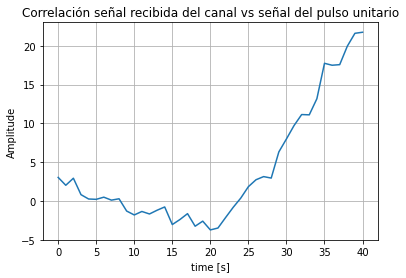

In [53]:
xcorr = np.correlate(delayed_pulse, rect_pulse)
plt.plot(xcorr)
plt.title("Correlación señal recibida del canal vs señal del pulso unitario")
plt.xlabel("time [s]")
plt.ylabel("Amplitude")
plt.grid()

maximo = np.argmax(xcorr)
print("El máximo de la correlación: ",maximo-1)
print("Retraso de la señal: ", maximo-len(rect_pulse))

Podemos apreciar que al realizar la correlación de estas señales y a diferencia de la autocorrelación del pulso unitario, el retraso aplicado al pulso por haber atravesado el canal de transmisión en de aproximadamente **20 segundos** porque es a partir de ahí donde la señal empieza a tomar esta caracteristica de triangulo propia de la autocorrelación de un pulso. Podemos concluir que a pesar de que una señal atraviese un canal de comunicación y en el camino gane ruido debido a las interferencias propias del canal, con la herramienta de la correlación podemos recuperar dicha señal y conocer el retraso que esta señal obtuvo por atravesar el canal de comunicación.

# 3. Análisis de Electroencefalograma (EEG)
-Cargue el archivo eeg.npy con numpy.load , para cada canal normalice en amplitud y elimine el nivel DC.
Luego escoja el canal de acuerdo al ultimo numero de su cédula a partir de la siguiente lista:
    
    -Canal 21

Finalmente grafique el canal elegido con y sin normalización usando subplot para una fácil comparación.


Text(0.5, 1.0, 'Señal EEG normalizada')

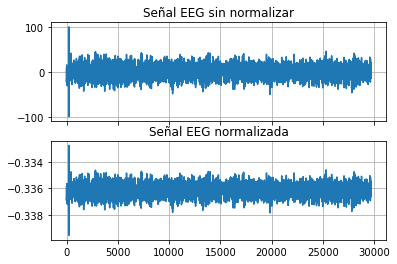

In [102]:
eeg = np.load('eeg.npy')
channel = 21

longitud = len(eeg[channel])
eeg_norm = eeg[channel]/longitud - np.mean(eeg[channel])


fig, (eegplt, eegnorm) = plt.subplots(2, 1, sharex=True)
eegplt.plot(eeg[channel])
eegplt.grid()
eegplt.set_title("Señal EEG sin normalizar")


eegnorm.plot(eeg_norm)
eegnorm.grid()
eegnorm.set_title("Señal EEG normalizada")


A pesar de que las señales parecen ser las mismas las diferencias son notables en los ejes de coordenadas y abcisas, por un lado al normalizar la señal en amplitud hay una considerable reducción, puesto que al normalizar la señal estamos llevandola a que dentro de sus posibles valores el máximo que pueda tomar sea de la unidad, esto para facilitar un analisis de cualquier tipo y, por otro lado, la señal además se desplaza un nivel hacia abajo centrado su media en un nivel negativo para este caso particular del canal asignado del analisis del electroencefalograma.


# 3.1. Coeficiente de correlación entre canales

1. Ahora calcule el coeficiente de correlación entre el canal que le corresponde y los otros canales. Finalmente,
grafique estos coeficientes de correlación (deben ser 25) utilizando la función plt.stem.

Tip: Use la función np.corrcoef para calcular los coeficientes.


Text(0.5, 1.0, 'Coeficientes de correlación vs canal 21')

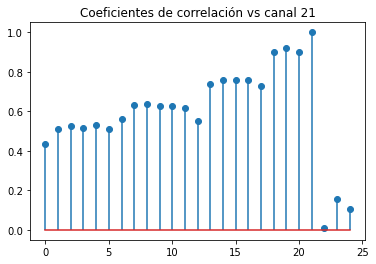

In [119]:
coeficientes = []
coef = 0

for canal in eeg:
    coef = np.corrcoef(eeg[channel], canal)
    coeficientes.append(min(coef[0]))
    
#print(len(coeficientes))
#print(coeficientes)

plt.stem(coeficientes, use_line_collection=True)
plt.title("Coeficientes de correlación vs canal 21")

2. ¿Cómo varia la correlación entre el canal que le corresponde y los demás canales?. Realice un breve análisis
de lo observado.

Era de esperarse que el máximo nivel de correlación sugerido para el canal 21 se iba a encontrar en el mismo canal, puesto que la correlación nos indica cuán parecidas son las señales uno con otra, y evidentemente entre las 25 señales sensadas por el EEG las señales van a diferir en varios puntos, excepto entre ella misma que es identica en todos los puntos. Cabe resaltar que entre las señales 22-24 con respecto a la señal asignada del canal 21 no existe un nivel de similaridad considerablemente alto como con las señales previas a la de dicho canal y este comportamiento se debe a que las señales 22-24 son las correspondientes a los electrodos ubicados cerca de los parpados del participante. De esta manera podemos diferenciar claramente las señales de los electrodos puestos en el cuero cabelludo del paciente y la de los sensores ubicados en lugales anatomicamente distintos a estos.

# 3.2. Función de autocorrelación de un canal

1. Calcule la función de autocorrelación del canal que le corresponde, luego calcule la función de correlación entre
la señal correspondiente, y uno de los canales de los ojos (canal 22 o 24), finalmente grafique y compare las dos
funciones utilizando subplots. Sugerencia: Haga zoom sobre las señales para observar mejor las diferencias.


29682

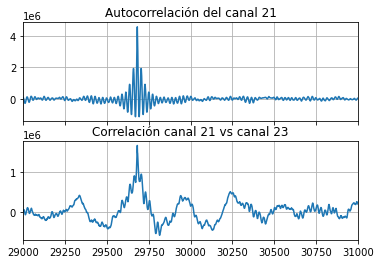

In [134]:
Rxx_EEG = np.correlate(eeg[channel], eeg[channel], mode='full')
Rxy = np.correlate(eeg[channel], eeg[23], mode='full')

fig, (autoc, corr) = plt.subplots(2, 1, sharex=True)
autoc.plot(Rxx_EEG)
autoc.grid()
autoc.set_title("Autocorrelación del canal 21")

corr.plot(Rxy)
corr.grid()
corr.set_title("Correlación canal 21 vs canal 23")

plt.xlim(29000, 31000)

np.argmax(Rxx_EEG)

2. ¿Qué observa?. Describa brevemente las gráficas obtenidas.

Para la gráfica de la autocorrelación es evidente que el pico de autocorrelación es justo en la muestra 29683, esto se debe a que al realizar la autocorrelación el número de muestras se duplica y como se trata de una autocorrelación su punto máximo se ubica en el centro de esta gráfica, además de ser una señal par, es decir es similar tanto de un lado a su punto central como del otro lado, estas son caracteristicas propias de la autocorrelación de señales.

Mientras que para la correlación de la señal de electrodo ubicado en el cuero cabelludo y la señal del sensor ubicada en las cercanías de los ojos del participante esta gráfica es considerablemente distinta, por un lado la señal se reduce de manera notable en amplitud y esa diferencia existe porque las señales operadas son bastante diferentes, mientras que la gráfica de la autocorrelación no existen estos picos que aparecen en la ultima gráfica, estos picos de menos amplitud nos brindan información de la frecuencia de muestreo a la que se realizó el sensado de los electrodos y de la gráfica se puede observar que es de aproximadamente 250 muestras por segundo lo cual coincide plenamente con la frecuencia de muestre que fue informado en el enunciado de la práctica.